In [1]:
import Pkg
include("../folder_path.jl")
import Pkg
Pkg.activate(project_folder)

  Activating project at `~/Projects/AAV2`


In [2]:
using JLD2, PyPlot, GaussianMixtures, BioSeqInt, Flux, Distributions

In [3]:
include(project_folder*"analysis/utils.jl")

auc (generic function with 1 method)

# Data

In [4]:
threshold_experiment1 = -1.0

-1.0

In [5]:
threshold_experiment2 = 1.0

1.0

In [6]:
threshold_experiment3 = 0.0

0.0

In [7]:
sequences_experiment1, counts_experiment1, labels_experiment1 = 
    load_data_cnn("$(project_folder)my_data/data_experiment1.jld2", threshold_experiment1, "experiment1");

In [8]:
sequences_experiment2, counts_experiment2, labels_experiment2 = 
    load_data_cnn("$(project_folder)my_data/data_experiment2.jld2",threshold_experiment2, "experiment2");

In [9]:
sequences_experiment3, counts_experiment3, labels_experiment3 = 
    load_data_cnn("$(project_folder)my_data/data_experiment3.jld2", threshold_experiment3, "experiment3");

# log selectivities

In [10]:
θexperiment1_cnn = [log(counts_experiment1[m,2] / counts_experiment1[m,1]) for m in axes(counts_experiment1, 1)];

In [11]:
θexperiment2_cnn = [log(counts_experiment2[m,2] / counts_experiment2[m,1]) for m in axes(counts_experiment2, 1)];

In [12]:
θexperiment3_cnn = [log(counts_experiment3[m,2] / counts_experiment3[m,1]) for m in axes(counts_experiment3, 1)];

In [13]:
θexperiment1_cnn = filter(isfinite, θexperiment1_cnn);
θexperiment2_cnn = filter(isfinite, θexperiment2_cnn)
θexperiment3_cnn = filter(isfinite, θexperiment3_cnn);

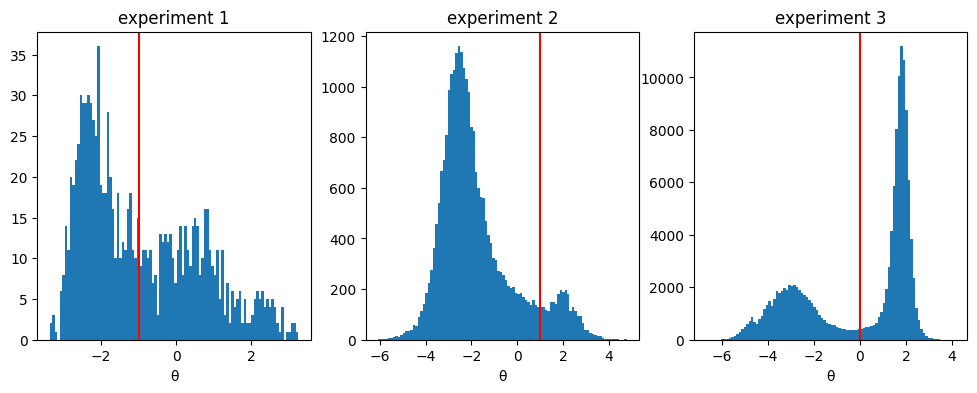

PyObject Text(0.5, 1.0, 'experiment 3')

In [14]:
fig, ax = subplots(1,3, figsize=(12,4))

ax[1].hist(filter(isfinite, θexperiment1_cnn), bins=100)
ax[1].axvline(threshold_experiment1, color="red")
ax[1].set_xlabel("θ")
ax[1].set_title("experiment 1")

ax[2].hist(filter(isfinite, θexperiment2_cnn), bins=100)
ax[2].axvline(threshold_experiment2, color="red")
ax[2].set_xlabel("θ")
ax[2].set_title("experiment 2")

ax[3].hist(filter(isfinite, θexperiment3_cnn), bins=100)
ax[3].axvline(threshold_experiment3, color="red")
ax[3].set_xlabel("θ")
ax[3].set_title("experiment 3")

# fit

In [15]:
gmm1 = GMM(2,1)
gmm1.μ .+= randn(2,1)
gmm1.Σ .*= 1e-1

2×1 Matrix{Float64}:
 0.1
 0.1

In [16]:
em!(gmm1, reshape(θexperiment1_cnn, :, 1); nIter=20)

20-element Vector{Float64}:
 -18.93788687302902
  -1.7939185873453853
  -1.785725623463446
  -1.779343987543537
  -1.7727158064811284
  -1.7656348234328794
  -1.7581385164258527
  -1.7503427447444975
  -1.7424226446131446
  -1.734601771261984
  -1.7271285049309113
  -1.7202376589216497
  -1.714103520272083
  -1.708804358912889
  -1.7043216911591552
  -1.7005727569383873
  -1.6974503961570457
  -1.694849951139271
  -1.6926807571169427
  -1.6908682496923464

In [17]:
gmm1.μ

2×1 Matrix{Float64}:
 -2.147216641617875
  0.3930412229122857

In [18]:
gmm2 = GMM(2,1)
gmm2.μ .+= randn(2,1)
gmm2.Σ .*= 1e-1

2×1 Matrix{Float64}:
 0.1
 0.1

In [19]:
em!(gmm2, reshape(θexperiment2_cnn, :, 1), nIter=20)

20-element Vector{Float64}:
 -58.67345041761678
  -1.8098304323248386
  -1.7965254280531058
  -1.7876193026513918
  -1.780927822761309
  -1.7757540829198777
  -1.7717167648493637
  -1.768560147079503
  -1.7660947826961089
  -1.7641717307833567
  -1.762671690180999
  -1.7614996298960286
  -1.760580861124493
  -1.7598574362631298
  -1.7592848187422763
  -1.758828966517768
  -1.7584639113957272
  -1.7581698296070334
  -1.7579315461337148
  -1.7577373958986822

In [20]:
gmm2.μ

2×1 Matrix{Float64}:
 -2.4097096292299454
  1.1073334572389406

In [21]:
gmm3 = GMM(2,1)
gmm3.μ .+= randn(2,1)
gmm3.Σ .*= 1e-1

2×1 Matrix{Float64}:
 0.1
 0.1

In [22]:
em!(gmm3, reshape(θexperiment3_cnn, :, 1), nIter=20)

20-element Vector{Float64}:
 -26.686948660771915
  -1.6649001873969203
  -1.617193938532669
  -1.6102291756801665
  -1.6079777348024045
  -1.6071983185597714
  -1.606921135505955
  -1.6068205659626158
  -1.6067834794844964
  -1.6067696442423376
  -1.6067644433534483
  -1.606762478686886
  -1.6067617342411962
  -1.6067614516176938
  -1.6067613441941455
  -1.606761303333028
  -1.6067612877834503
  -1.60676128186444
  -1.606761279610952
  -1.6067612787529122

In [23]:
gmm3.μ

2×1 Matrix{Float64}:
  1.7757079969477505
 -2.7238620354563223

In [24]:
function eval_gmm(gmm, x)
    g1 = Normal(gmm.μ[1,1], gmm.Σ[1,1])
    g2 = Normal(gmm.μ[2,1], gmm.Σ[2,1])
    g = MixtureModel([g1, g2], gmm.w)
    return pdf.(g, x)
end

eval_gmm (generic function with 1 method)

In [25]:
x1 = LinRange(-3,3,100)
x2 = LinRange(-7,5,100)
x3 = LinRange(-7,5,100);

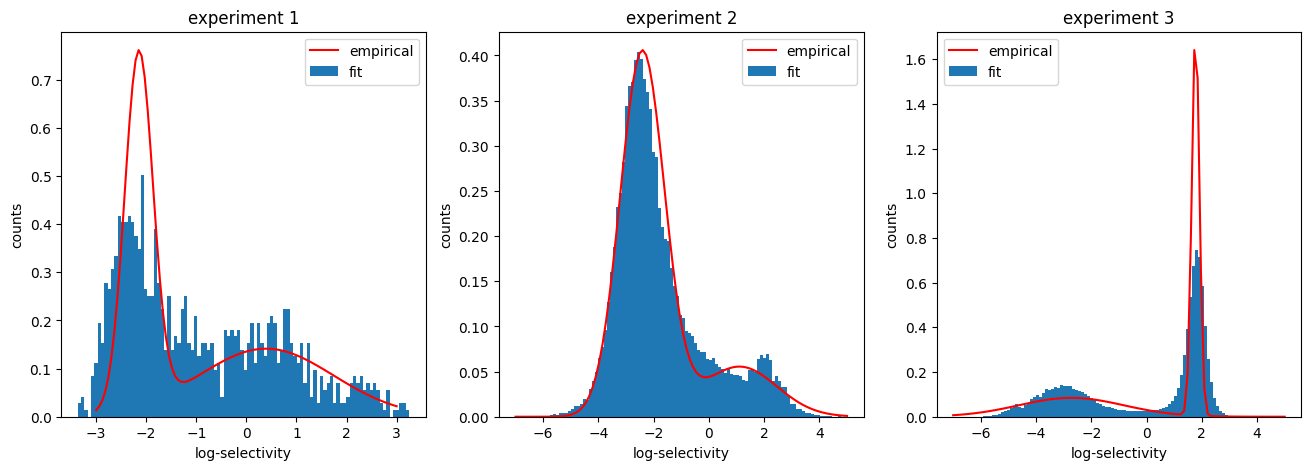

PyObject Text(0.5, 1.0, 'experiment 3')

In [36]:
fig, ax = subplots(1,3, figsize=(16,5))

ax[1].hist(θexperiment1_cnn, bins=100, density=true)
ax[1].plot(x1, eval_gmm(gmm1, x1), color="red")
ax[1].set_xlabel("log-selectivity")
ax[1].set_ylabel("counts")
ax[1].legend(["empirical", "fit"])
ax[1].set_title("experiment 1")

ax[2].hist(θexperiment2_cnn, bins=100, density=true)
ax[2].plot(x2, eval_gmm(gmm2, x2), color="red")
ax[2].set_xlabel("log-selectivity")
ax[2].set_ylabel("counts")
ax[2].legend(["empirical", "fit"])
ax[2].set_title("experiment 2")

ax[3].hist(θexperiment3_cnn, bins=100, density=true)
ax[3].plot(x3, eval_gmm(gmm3, x3), color="red")
ax[3].set_xlabel("log-selectivity")
ax[3].set_ylabel("counts")
ax[3].legend(["empirical", "fit"])
ax[3].set_title("experiment 3")

In [27]:
function intersections(gmm)
    m1 = gmm.μ[1,1]
    m2 = gmm.μ[2,1]
    s1 = gmm.Σ[1,1]
    s2 = gmm.Σ[2,1]
    w1 = gmm.w[1]
    w2 = gmm.w[2]
    
    a = s2^2 - s1^2
    b = m1*s2^2 - m2*s1^2
    c = m1^2*s2^2 - m2^2*s1^2 + 2*s1^2*s2^2*log((w2/w1)*(s1/s2))
    
    x1 = (b + sqrt(b^2-a*c))/a
    x2 = (b - sqrt(b^2-a*c))/a
    
    return x1,x2
end

intersections (generic function with 1 method)

In [28]:
xa_1,xb_1 =intersections(gmm1)

(-1.498227790295981, -3.029755316847414)

In [29]:
xa_2,xb_2 =intersections(gmm2)

(-0.5389012797223257, -8.07965823074039)

In [30]:
xa_3,xb_3 =intersections(gmm3)

(2.268175240797104, 1.3301224673438485)

In [31]:
function find_valley(gmm, resolution::Int)
    xmin = gmm.μ[1,1]
    xmax = gmm.μ[2,1]
    r = LinRange(xmin, xmax, resolution)
    y = eval_gmm(gmm, r)
    xvalley = argmin(y)
    return r[xvalley]
end

find_valley (generic function with 1 method)

In [32]:
find_valley(gmm1, 100)

-1.2491456794102425

In [33]:
find_valley(gmm2, 100)

-0.13606561373490778

In [34]:
find_valley(gmm3, 100)

1.23030556877756